In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

## 1. Analiza eksploracyjna zbioru danych

**Wczytanie i przygotowanie danych do dalszej analizy**

In [2]:
headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red',
           'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters',
           'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
flags = pd.read_csv('flag.data', names = headers, index_col = 0)

colors = {'black': 1, 'blue': 2, 'brown': 3, 'gold': 4, 'green': 5, 'orange': 6, 'red': 7, 'white': 8}
flags['mainhue'] = flags['mainhue'].map(colors)
flags['topleft'] = flags['topleft'].map(colors)
flags['botright'] = flags['botright'].map(colors)

flags

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,...,0,0,1,0,0,1,0,0,1,5
Albania,3,1,29,3,6,6,0,0,3,1,...,0,0,1,0,0,0,1,0,7,7
Algeria,4,1,2388,20,8,2,2,0,3,1,...,0,0,1,1,0,0,0,0,5,8
American-Samoa,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,1,1,1,0,2,7
Andorra,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western-Samoa,6,3,3,0,1,1,0,0,3,1,...,0,1,5,0,0,0,0,0,2,7
Yugoslavia,3,1,256,22,6,6,0,3,4,1,...,0,0,1,0,0,0,0,0,2,7
Zaire,4,2,905,28,10,5,0,0,4,1,...,0,0,0,0,0,1,1,0,5,5


In [3]:
#braki w danych i uzupelnienie ich
missingTest = flags.isnull()
missingTest.all(axis='columns')
missingTest.any()

landmass      False
zone          False
area          False
population    False
language      False
religion      False
bars          False
stripes       False
colours       False
red           False
green         False
blue          False
gold          False
white         False
black         False
orange        False
mainhue       False
circles       False
crosses       False
saltires      False
quarters      False
sunstars      False
crescent      False
triangle      False
icon          False
animate       False
text          False
topleft       False
botright      False
dtype: bool

W naszym zestawie danych nie ma braków(co pokazują powyższe testy), więc nie trzeba ich uzupełniać.

**Analiza pojedynczych atrybutow**

In [22]:
flags.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
flags.mode()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,4,1,0,0,10,1,0,0,3,1,...,0,0,0,0,0,0,0,0,red,red


In [24]:
#dodane, aby móc zobaczyć całą ramkę danych
flags.mode().to_string()

'   landmass  zone  area  population  language  religion  bars  stripes  colours  red  green  blue  gold  white  black  orange  mainhue  circles  crosses  saltires  quarters  sunstars  crescent  triangle  icon  animate  text topleft botright\n0         4     1     0           0        10         1     0        0        3    1      0     1     0      1      0       0        7        0        0         0         0         0         0         0     0        0     0     red      red'

* większość krajów leży w Afryce
* większość krajów leży w strefie północno-wschodniej
* w większości krajów językiem urzędowym jest język z grupy określonej jako "inne"
* w większości krajów dominującym wyznanien jest odłam chrześcijaństwa niebędący katolicyzmem

* najwięcej flag nie posiada pionowych i poziomych kresek oraz ma trzy kolory
* większość flag zawiera kolor czerwony, niebieski oraz biały. Z drugiej strony kolory zielony, złoty, czarny oraz pomarańczowy występują w mniej niż połowie flag
* najczęstszym kolorem dominującym jest czerwony
* wszystkie bardziej specyficzne atrybuty(circles  crosses  saltires  quarters  sunstars  crescent  triangle  icon  animate  text) występują w mniej niż 50% flag
* kolorem najczęściej występującym w prawym górnym oraz lewym dolnym rogu jest czerwony

**Wizualizacja danych na podstawie atrybutow decyzjynych**

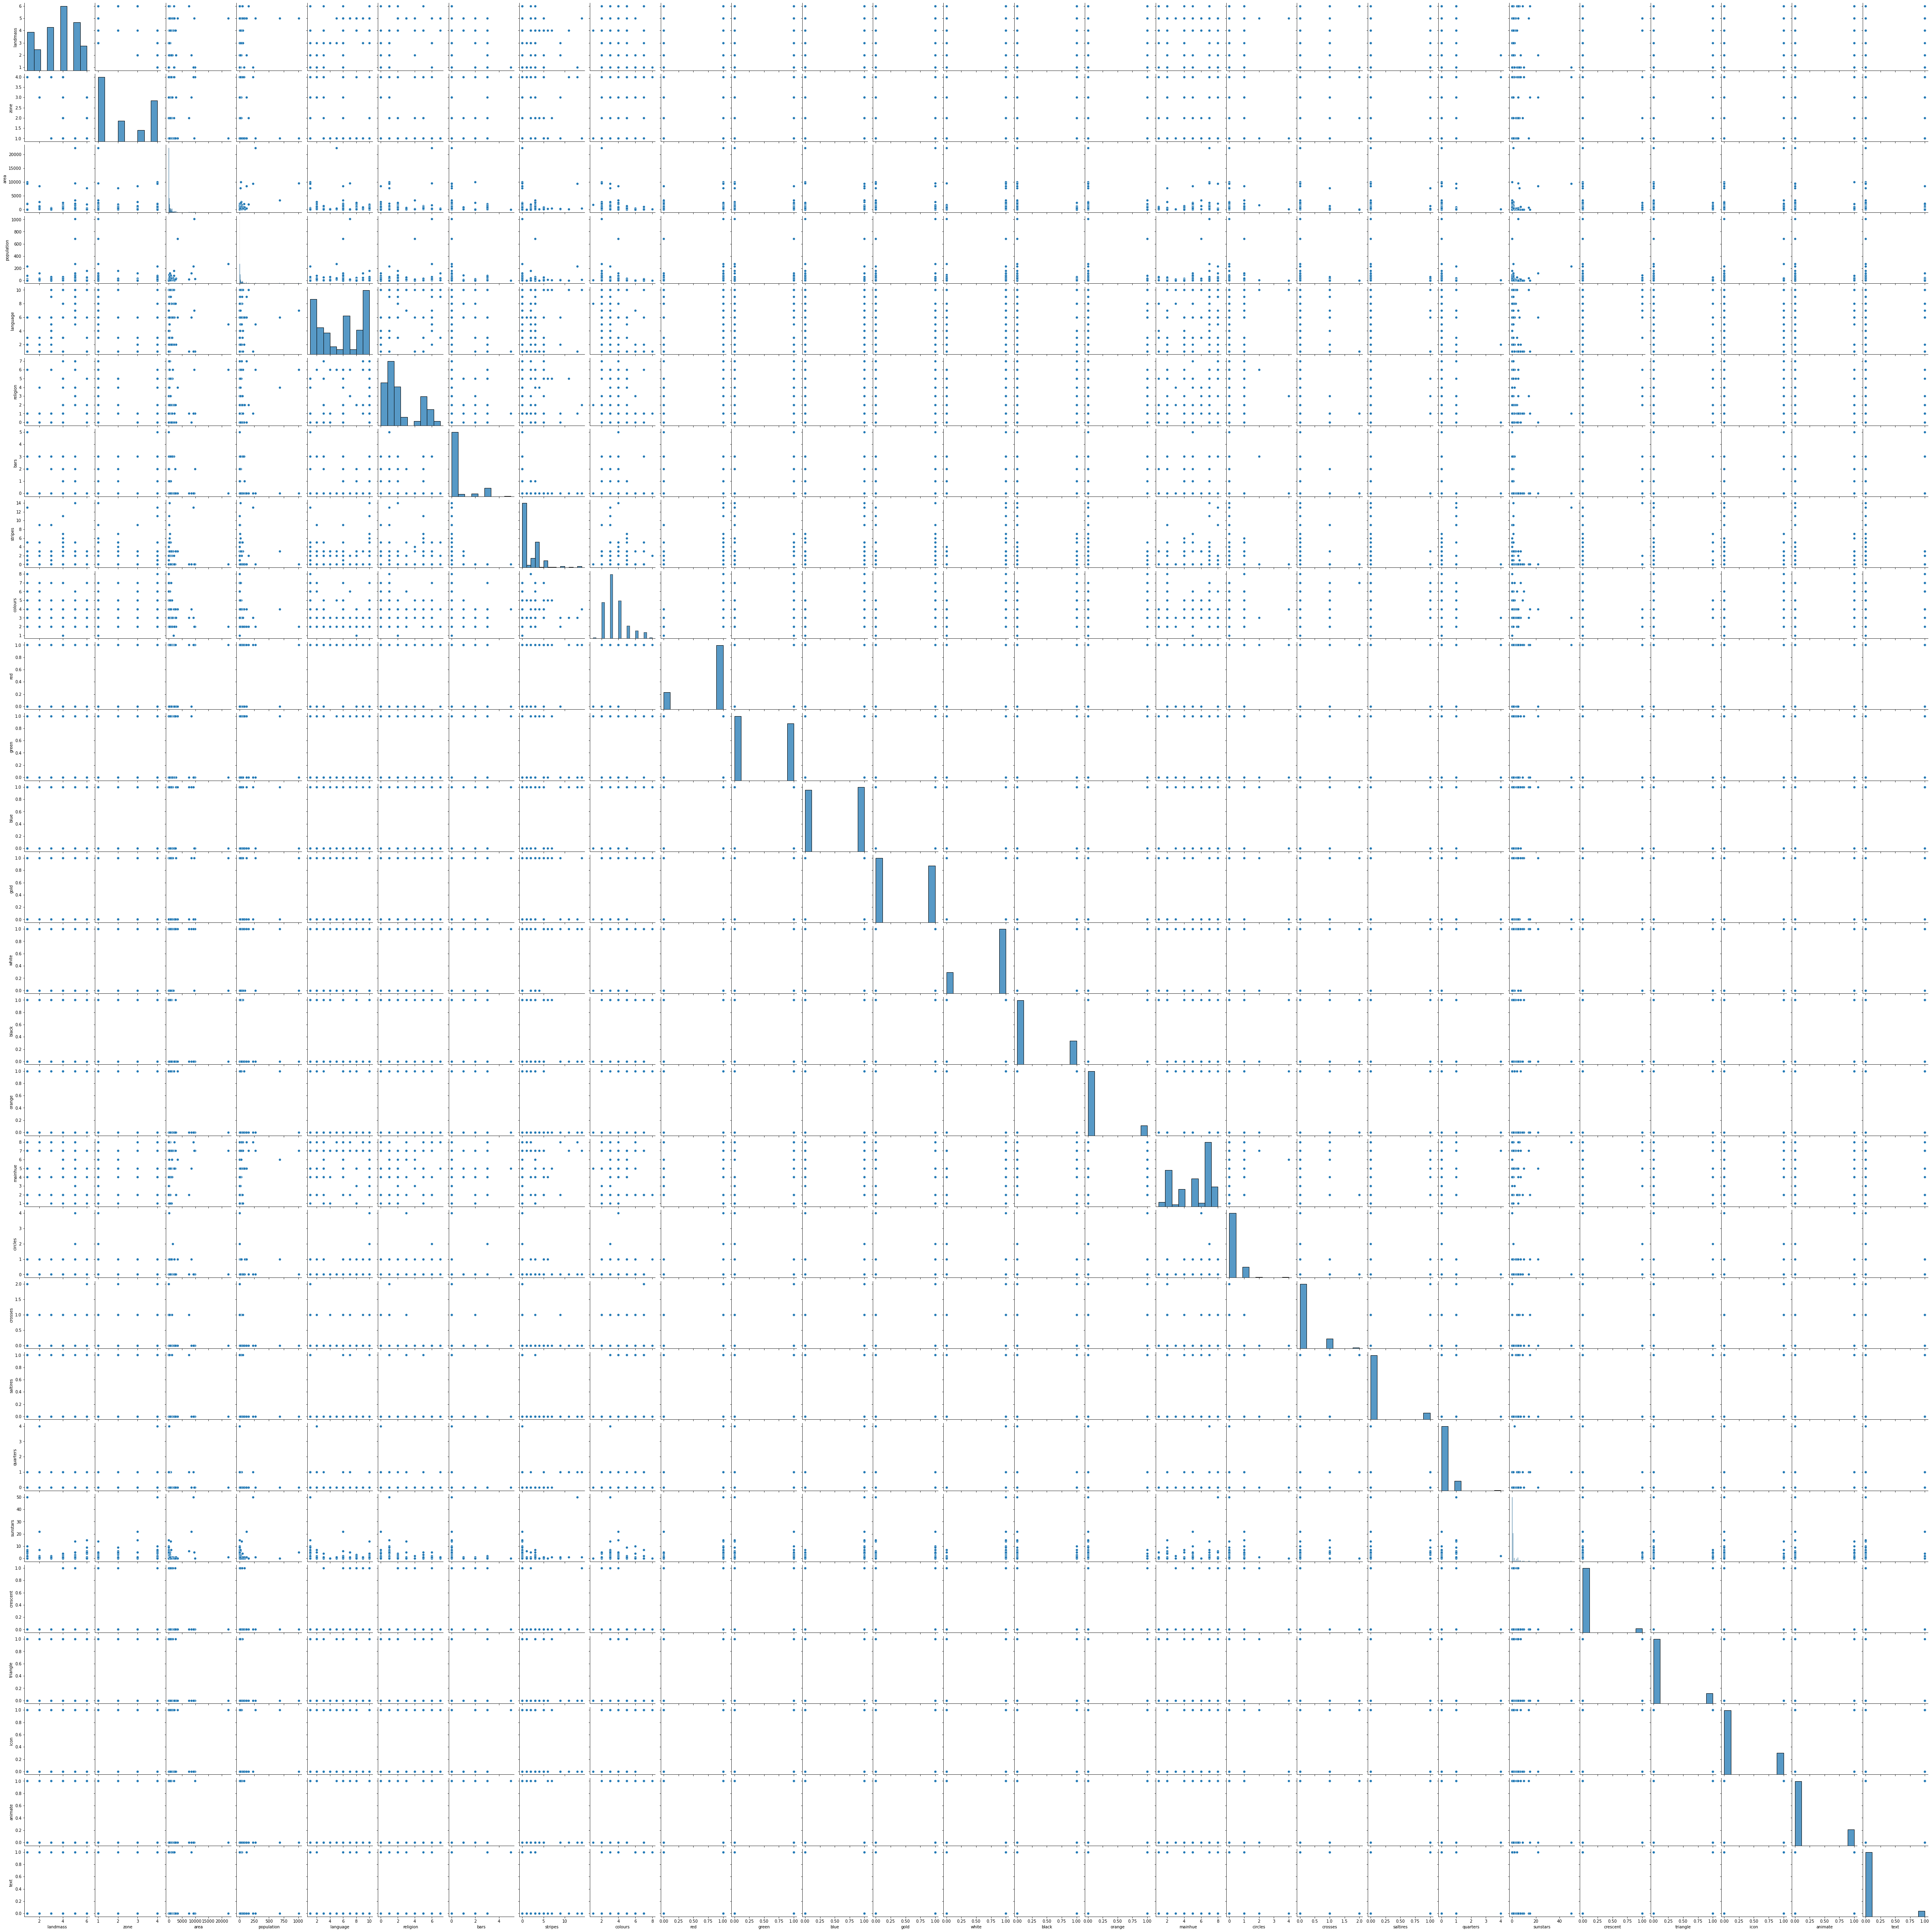

In [25]:
#Najprawdopodobniej do wyrzucenia
dec_atr = ['landmass', 'zone', 'language', 'religion']
atrs = flags.columns
atr_n = len(atrs)
sns.pairplot(flags, kind = 'scatter')

## 2. Grupowanie zbioru danych

**Grupowanie metodą k-srednich i analiza wyników**

<ipython-input-17-6719c5aa6bd2>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  miara_jakosci = pd.Series()


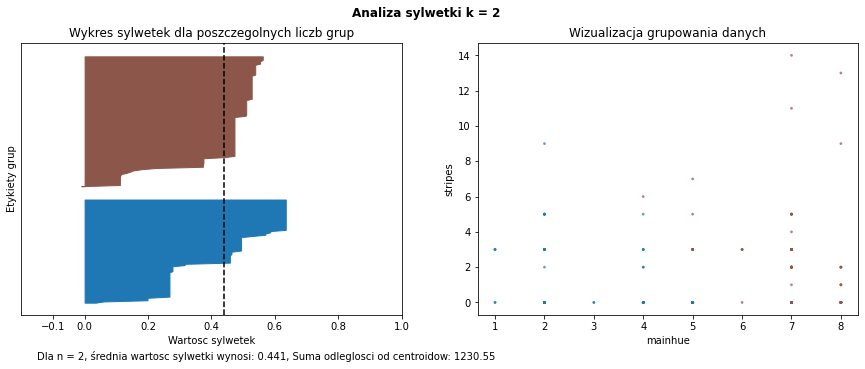

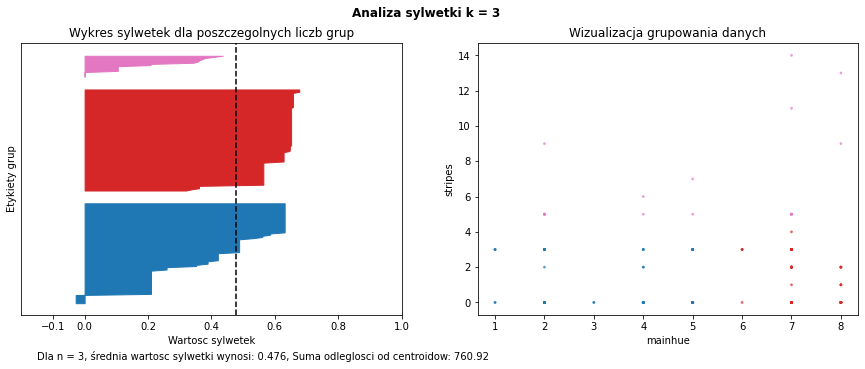

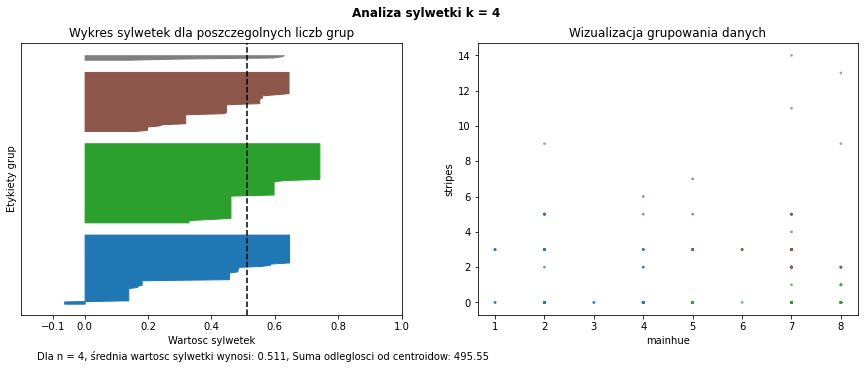

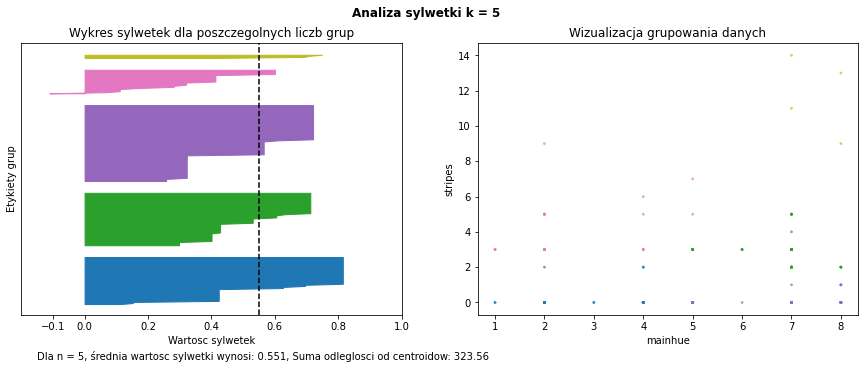

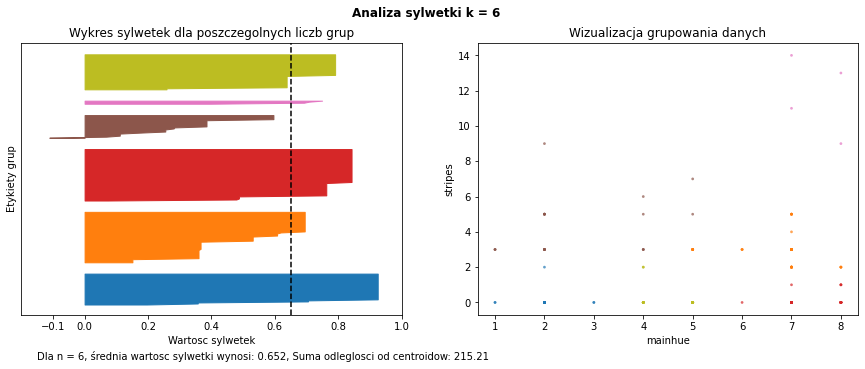

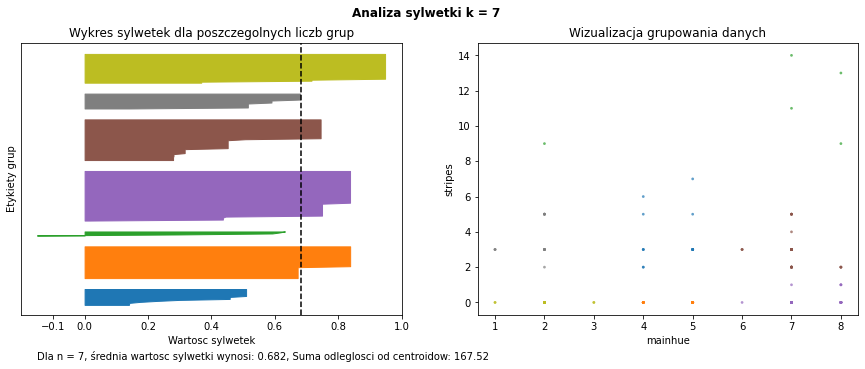

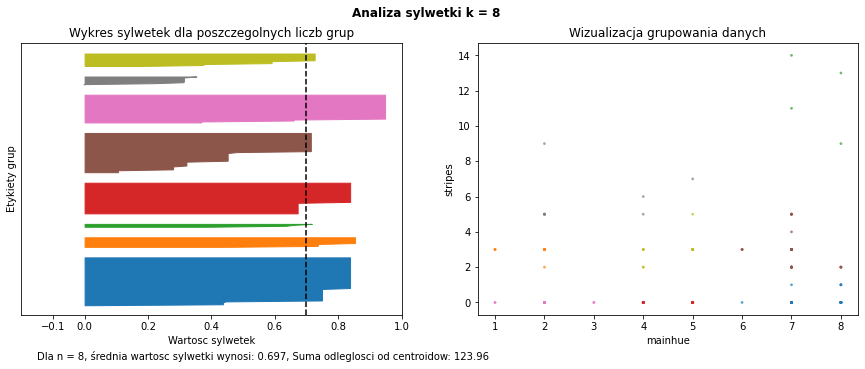

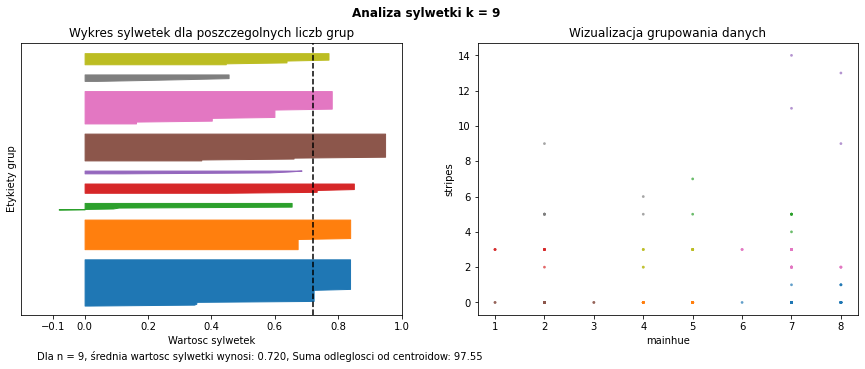

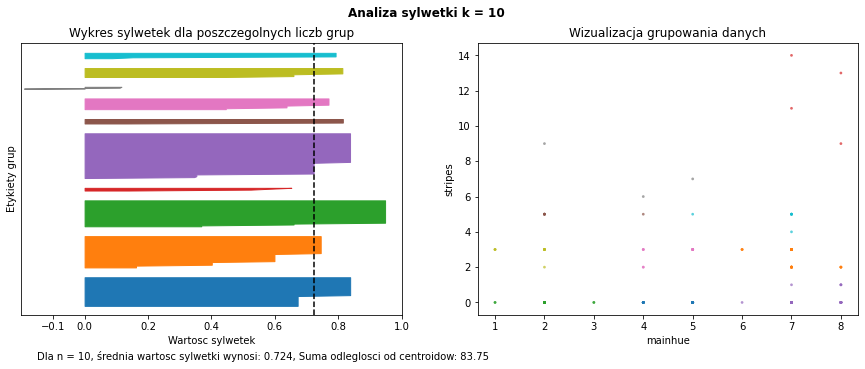

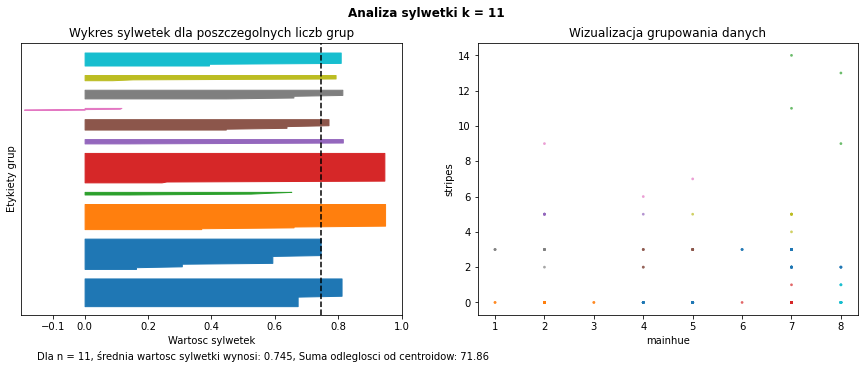

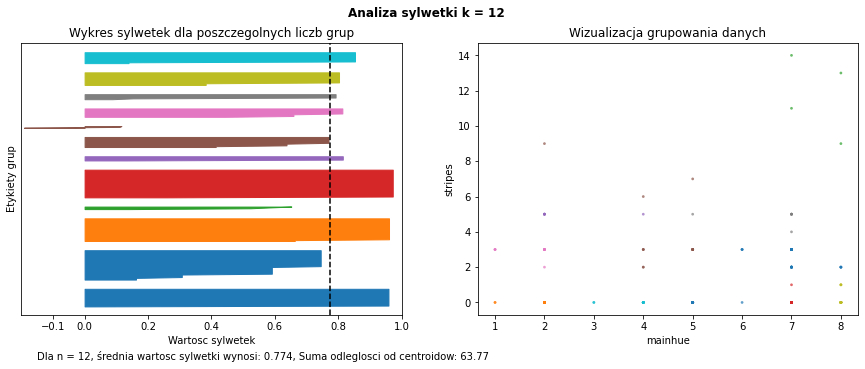

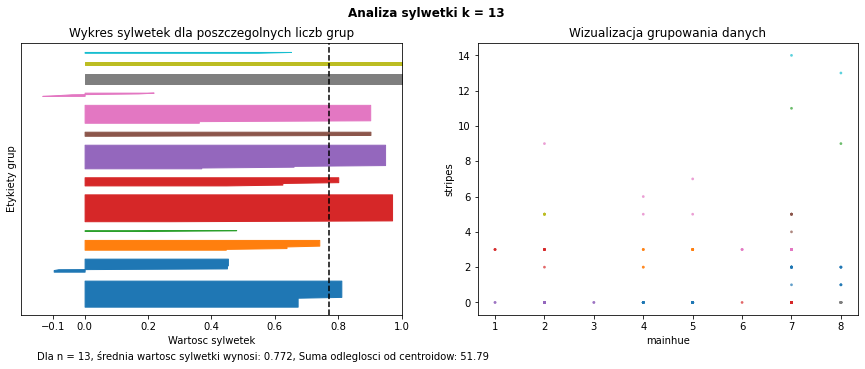

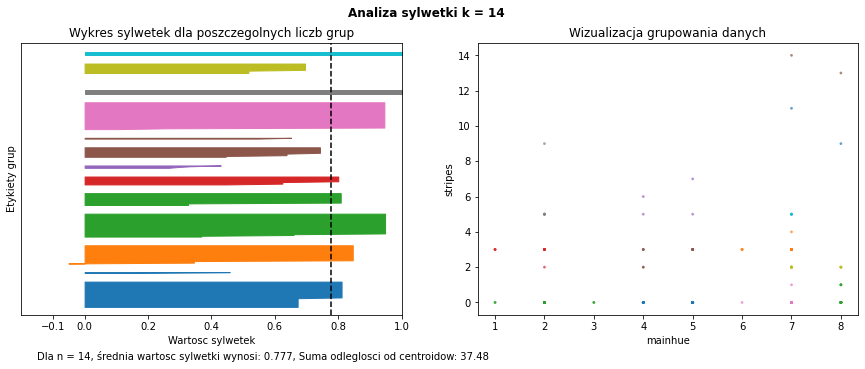

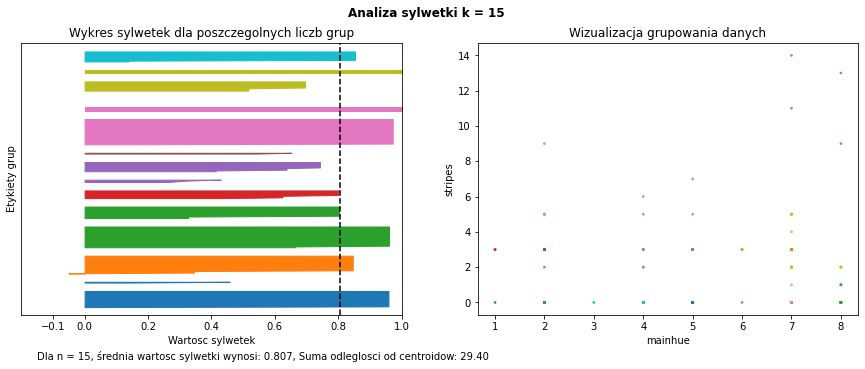

Text(0, 0.5, 'Suma odleglosci od centroidow')

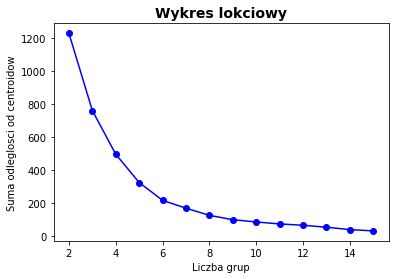

In [17]:
liczby_grup = range(2, 16)
miara_jakosci = pd.Series()
flags_kmeans = flags[['mainhue', 'stripes']]
group_labels_list = [np.nan, np.nan]

for ile_grup in liczby_grup :
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)

    ax1.set_xlim([-0.2, 1]) # zakres zmian współczynnika sylwetki
    ax1.set_ylim([0, len(flags_kmeans) + (ile_grup + 1) * 10]) # organizacja wydruku
    
    kmeans = KMeans(n_clusters = ile_grup, random_state = 0).fit(flags_kmeans)
    miara_jakosci = miara_jakosci.append(pd.Series(kmeans.inertia_))
    etykiety_grup = kmeans.fit_predict(flags_kmeans[['mainhue','stripes']])
    group_labels_list.append(etykiety_grup)
 
    # oblicza miary sylwetek dla każdek grupy
    sylwetka = silhouette_samples(flags_kmeans[['mainhue','stripes']], etykiety_grup)   
    # średnia wartość sylwetki
    srednia_sylwetka = silhouette_score(flags_kmeans[['mainhue','stripes']], etykiety_grup)
    
    pozycja_kreski = 10
    for i in range(ile_grup):
        # Zebranie wyników sylwetek do próbek należących do klastra i ich sortowanie
        sylwetka_w_grupie = sylwetka[etykiety_grup == i]
        sylwetka_w_grupie.sort()

        liczebnosc_grupy = sylwetka_w_grupie.shape[0]
        kolor = cm.tab10(float(i) / ile_grup)
        ax1.fill_betweenx(np.arange(pozycja_kreski, pozycja_kreski + liczebnosc_grupy), 0, sylwetka_w_grupie ,color = kolor)

        # Wyliczenie przesunięcia w pionie dla wykresu kolejnej grupy
        pozycja_kreski += liczebnosc_grupy + 10  # 10 dla kolejnej próbki
        
    ax1.set_title("Wykres sylwetek dla poszczegolnych liczb grup")
    ax1.set_xlabel("Wartosc sylwetek")
    ax1.set_ylabel("Etykiety grup")

    # Wyrysowanie wartości średniej sylwetki 
    ax1.axvline(x = srednia_sylwetka, color = "black", linestyle = "--")
    ax1.set_yticks([])  # Wyczyszczenie etykiety osi Y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Drugi wykres będzie przedstawiał klastry
    kolory = cm.tab10(etykiety_grup.astype(float) / ile_grup)
    ax2.scatter(flags_kmeans.mainhue, flags_kmeans.stripes, marker = '.', s = 30, lw = 0, alpha = 0.7,c = kolory)

    ax2.set_title("Wizualizacja grupowania danych")
    ax2.set_xlabel("mainhue")
    ax2.set_ylabel("stripes")

    plt.suptitle(("Analiza sylwetki k = %d" % ile_grup),  fontweight = 'bold')
    plt.figtext(0.14, 0, ("Dla n = %d, średnia wartosc sylwetki wynosi: %.3f, Suma odleglosci od centroidow: %.2f"
                 % (ile_grup, srednia_sylwetka, kmeans.inertia_ ) ))
    plt.show()
    
plt.plot(liczby_grup, miara_jakosci,'bo-')
plt.title("Wykres lokciowy", fontsize = 14, fontweight = 'bold')
plt.xlabel("Liczba grup")
plt.ylabel("Suma odleglosci od centroidow")

In [46]:
#Aby sprawdzić ręcznie grupy jakie powstały
number_of_groups = 5
group_number = 2
lb = group_labels_list[number_of_groups]
flags['group'] = lb
flags[flags['group'] == group_number]

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,group
name,,,,,,,,,,,,,,,,,,,,,
Albania,3,1,29,3,6,6,0,0,3,1,...,0,1,0,0,0,1,0,7,7,2
Algeria,4,1,2388,20,8,2,2,0,3,1,...,0,1,1,0,0,0,0,5,8,2
Anguilla,1,4,0,0,1,1,0,1,3,0,...,0,0,0,0,0,1,0,8,2,2
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,...,0,1,0,1,0,0,0,1,7,2
Bahrain,5,1,1,0,8,2,0,0,2,1,...,0,0,0,0,0,0,0,8,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,6,2,15,0,6,1,0,0,4,1,...,0,0,0,1,0,1,0,1,5,2
Vietnam,5,1,333,60,10,6,0,0,2,1,...,0,1,0,0,0,0,0,7,7,2
Western-Samoa,6,3,3,0,1,1,0,0,3,1,...,1,5,0,0,0,0,0,2,7,2


**Wnioski o ilości grup**
* Z wykresu łokciowego wynika, że optymalna liczba grup mieści się w przedziale = <6-12>
* Z analizy sylwetki wynika, że optymalna liczba grup mieści się w przedziale = {5} u <10-12>(ale żadna ilość grup nie pasuje idealnie)
* Z obu tych analiz można stwierdzić, że optymalna ilość grup mieści się w przedziale <10-12>.

**Hierarchiczne grupowanie aglomeraycjne i analiza wyników**

**Wnioski o ilości grup**

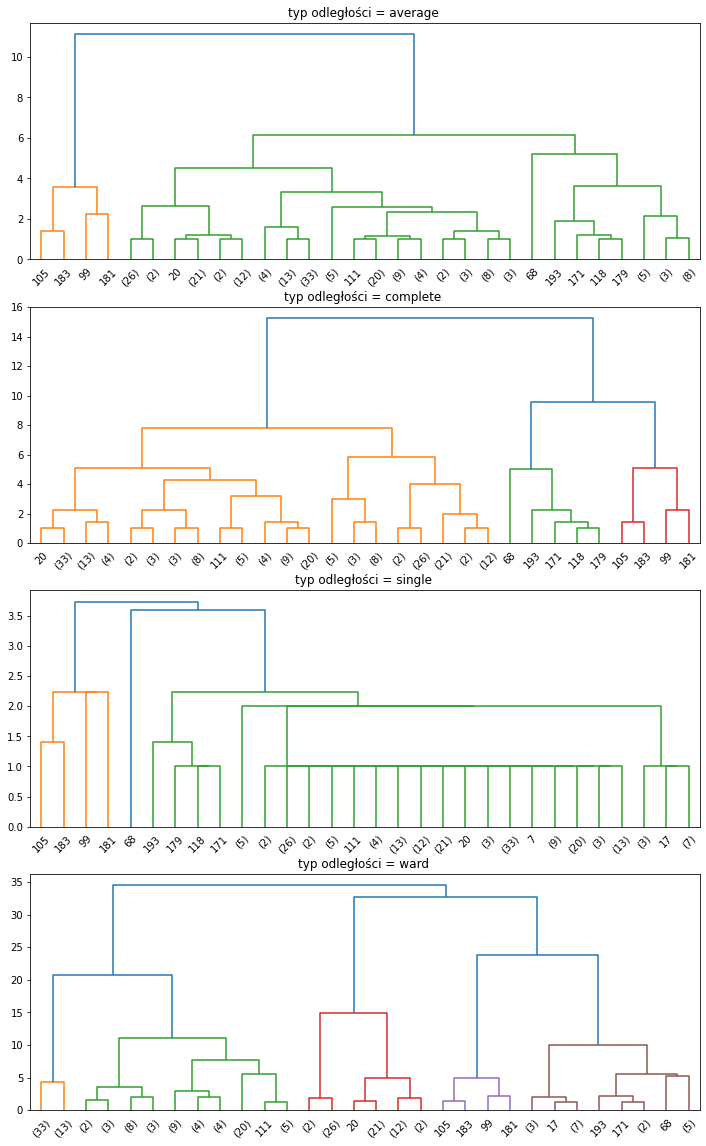

In [16]:
plt.figure(figsize=(12, 20))
for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
        wy = plt.subplot(4, 1, index + 1)
        wy.set_title('typ odległości = %s ' % typ_odleglosci)
        grupy = linkage(df, method = typ_odleglosci, metric = 'euclidean')
        prog_proc = 60
        prog = prog_proc*max(grupy[:,2])/100
        cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
        df['grupa'] = fcluster(grupy, prog, criterion = 'distance')

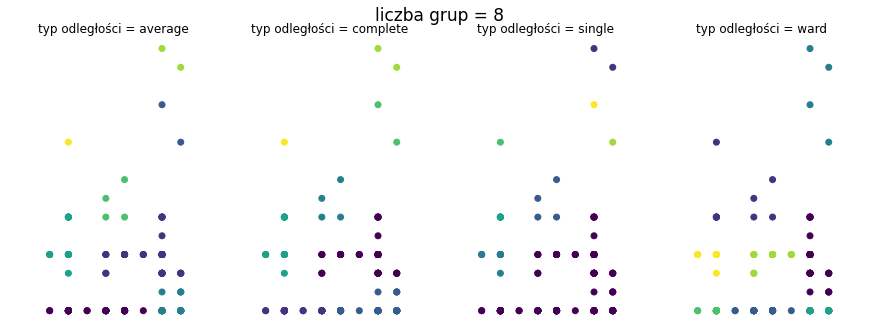

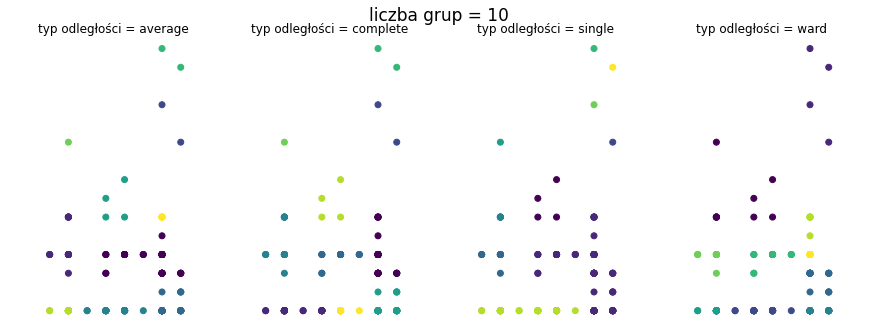

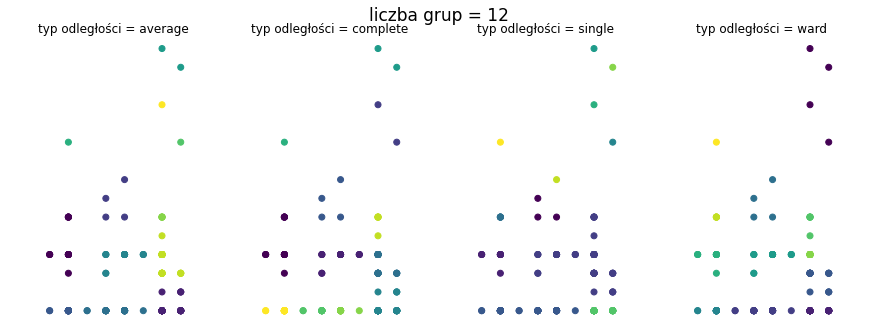

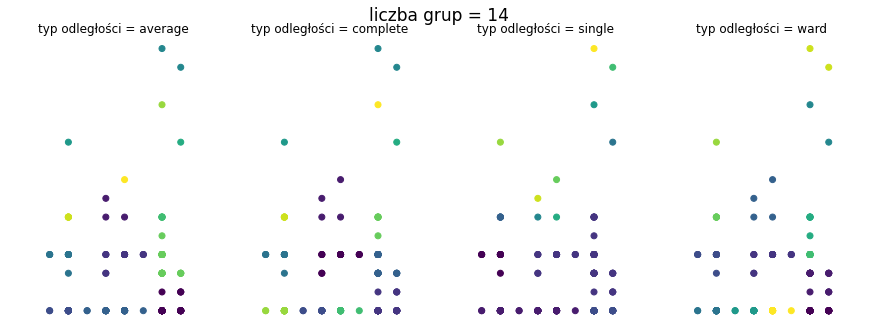

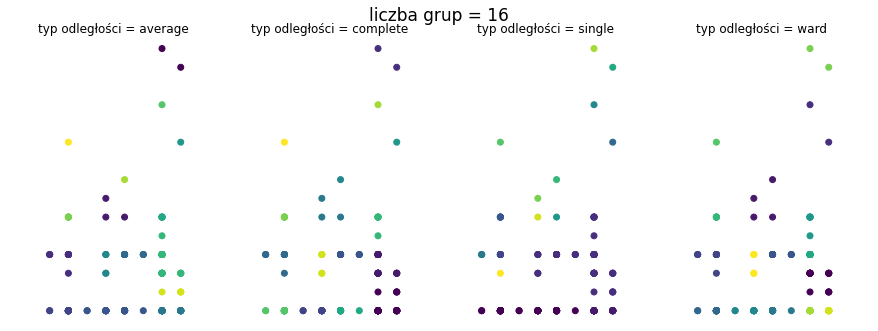

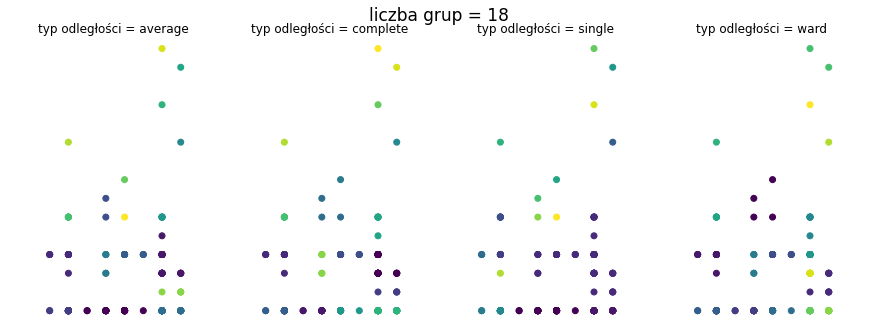

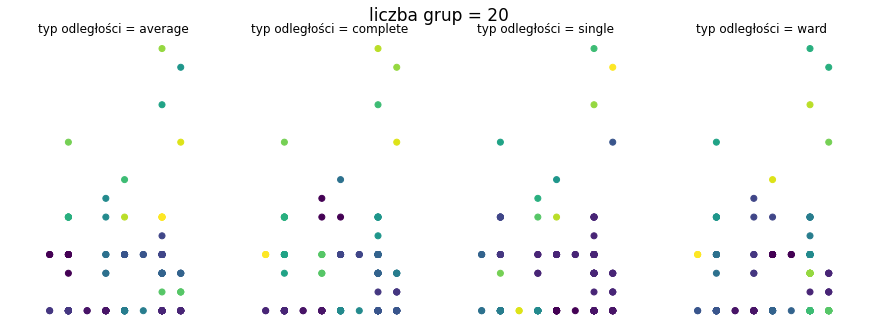

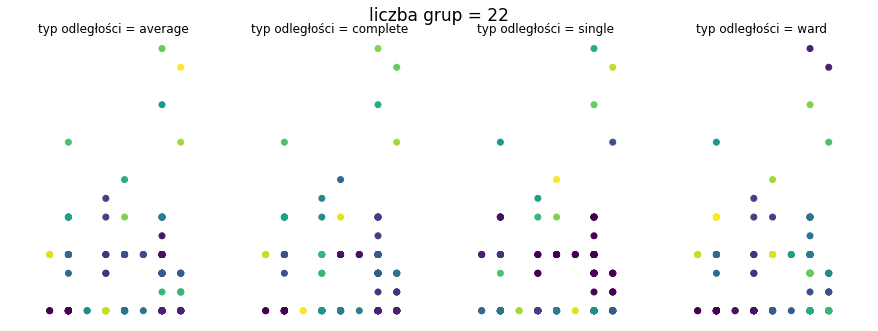

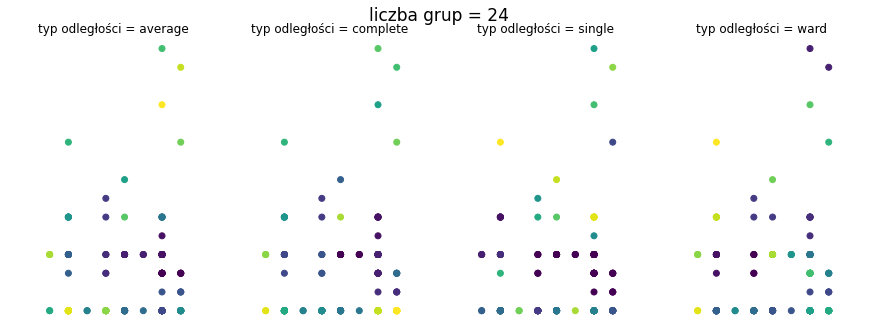

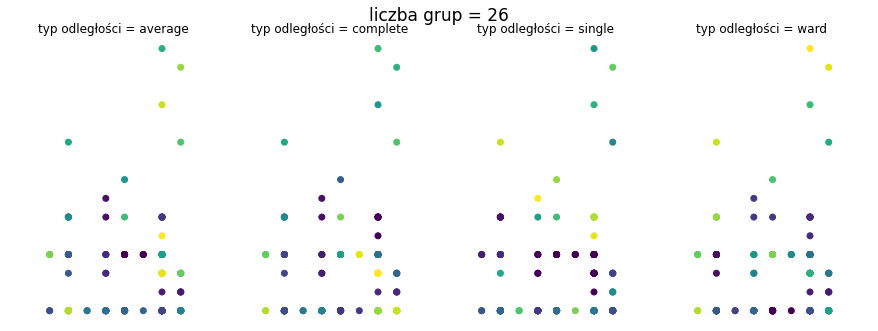

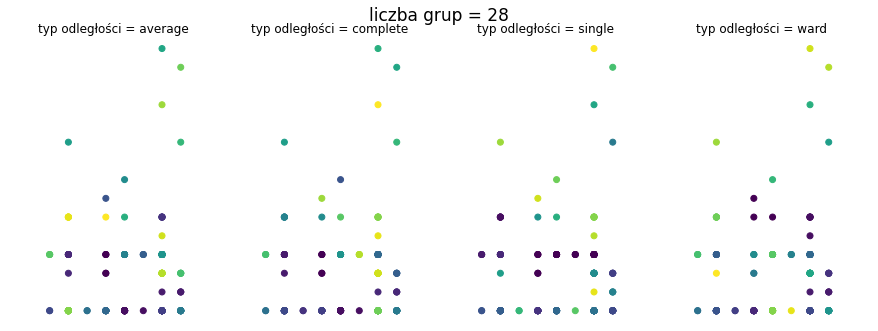

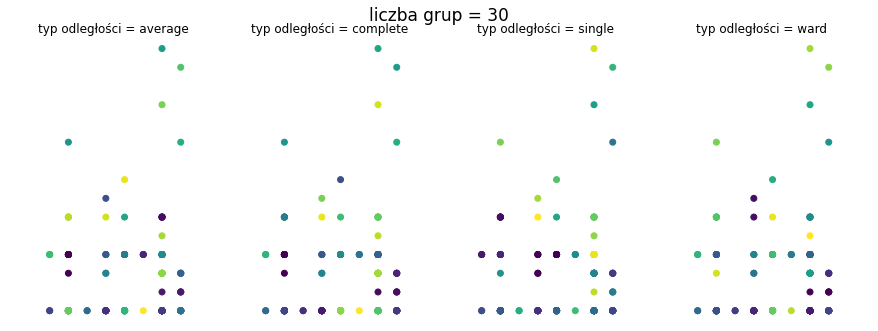

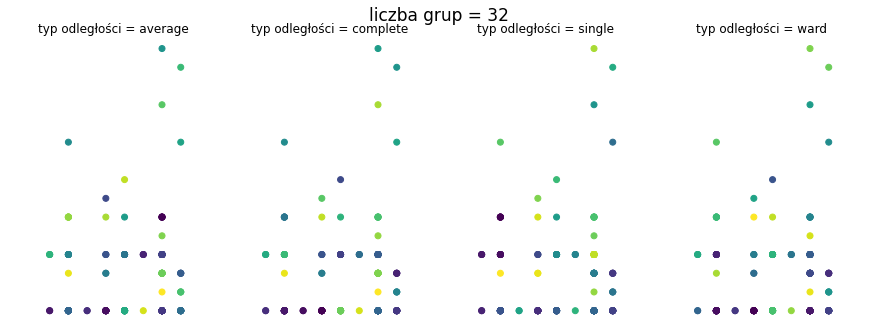

In [7]:
for ile_grup in (8,10,12,14,16,18,20,22,24,26,28,30,32):
    plt.figure(figsize=(12, 4.5))
    for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
        
        plt.subplot(1, 4, index + 1)
        model = AgglomerativeClustering(linkage = typ_odleglosci, n_clusters = ile_grup)
        model.fit(df)
        plt.scatter(df.mainhue, df.stripes, c = model.labels_)
        plt.title('typ odległości = %s ' % typ_odleglosci, fontdict=dict(verticalalignment = 'top'))
        plt.axis('equal')
        plt.axis('off')
        plt.subplots_adjust(bottom = 0, top = .89, wspace = 0, left = 0, right = 1)
        plt.suptitle('liczba grup = %i' % ile_grup, size = 17)

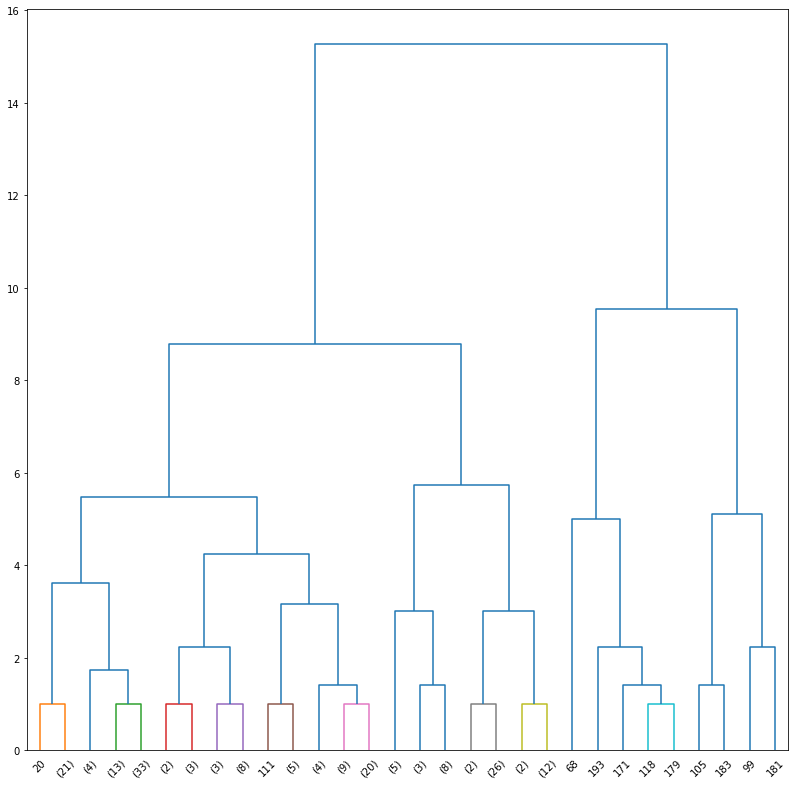

In [18]:
df = flags.drop(columns = ['landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'colours', 'red',
           'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles', 'crosses', 'saltires', 'quarters',
           'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])

#nowa ramka bez kolumny z informacją o klasie
grupy = linkage(df, method = 'complete', metric = 'euclidean')
prog_proc = 7
prog = prog_proc*max(grupy[:,2])/100
# zamiast linkage(df, method='ward', metric='euclidean') można napisać ward(df)
plt.figure(figsize = (30,30))
plt.subplot(2,2,3)
cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
df['grupa'] = fcluster(grupy, prog, criterion = 'distance')

In [20]:
pierwsze = range(1,23)
for pierwsza in pierwsze:
    print(df[df['grupa'] == pierwsza])

                 stripes  mainhue  grupa
name                                    
Albania                0        7      1
Bahrain                0        7      1
Bermuda                0        7      1
Bhutan                 0        6      1
Burma                  0        7      1
Burundi                0        7      1
Canada                 0        7      1
China                  0        7      1
Congo                  0        7      1
Denmark                0        7      1
Kampuchea              0        7      1
Kiribati               0        7      1
Maldive-Islands        0        7      1
Malta                  0        7      1
Mongolia               0        7      1
Morocco                0        7      1
Norway                 0        7      1
Panama                 0        7      1
Peru                   0        7      1
Portugal               0        7      1
Romania                0        7      1
Rwanda                 0        7      1
Seychelles      

Text(0.5, 1.0, 'Macierz pomyłek dla kontynentu')

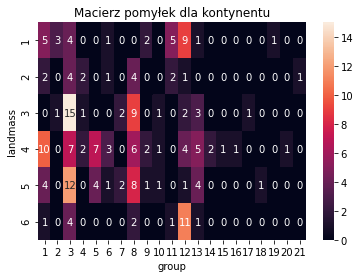

In [19]:
#dodanie grup jako atrybutu do głównej ramki danych
flags["group"] = df["grupa"]

pomylki = pd.crosstab(flags['landmass'], flags['group'])
sns.heatmap(pomylki,annot = pomylki)
plt.title('Macierz pomyłek dla kontynentu')

**Wnioski dla macierzy pomyłek z kontynentami**
* Biorąc pod uwagę całą macierz można stwierdzić, że kontynent, na którym znajduje się kraj ma niewielki wpływ na jego flagę.

Text(0.5, 1.0, 'Macierz pomyłek dla strefy')

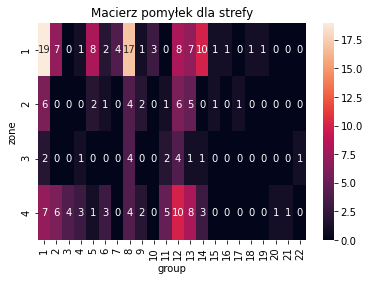

In [33]:
pomylki = pd.crosstab(flags['zone'], flags['group'])
sns.heatmap(pomylki,annot = pomylki)
plt.title('Macierz pomyłek dla strefy')

**Wnioski dla macierzy pomyłek dla strefy**
* Strefa, w której leży kraj podobnie jak kontynent nie mają zbyt dużego wpływu na wygląd flagi.

Text(0.5, 1.0, 'Macierz pomyłek dla języka')

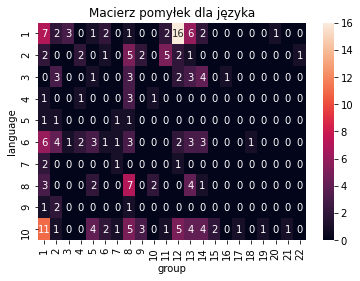

In [32]:
pomylki = pd.crosstab(flags['language'], flags['group'])
sns.heatmap(pomylki2,annot = pomylki)
plt.title('Macierz pomyłek dla języka')

**Wnioski do macierzy pomyłek dla języka**
* Może to być przypadek, ale z analizy danych wynika, że język ma większy wpływ na wygląd flagi niż zarówno kontynent jak i strefa. 
* Jedynie dla atrybutu język o wartości 10 (języki oznaczone jako "inne") jest więcej pomyłek ze względu na większą różnorodność języków w tej kategorii.

Text(0.5, 1.0, 'Macierz pomyłek dla religii')

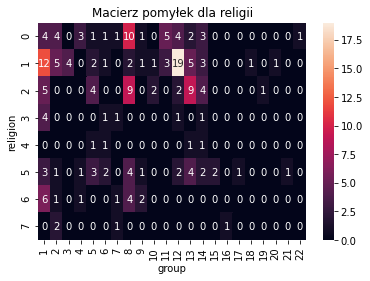

In [31]:
pomylki = pd.crosstab(flags['religion'], flags['group'])
sns.heatmap(pomylki3,annot = pomylki)
plt.title('Macierz pomyłek dla religii')

**Wnioski do macierzy pomyłek dla religi**
* Religia posiada wpływ na wyglad flagi, ale my grupowaliśmy po elementach, na które ta nie ma wpływu (tj. ilość pionowych kresek i kolor przewodni). 

**Analiza pojedynczych atrybutow w zaleznosci od grupy**

In [32]:
groups = range(1,15) #bigger than 15 - one country in group
flags_slimmed = flags.drop(['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'topleft', 'botright'], axis = 1)

for group_number in groups:
    frame_group = flags_slimmed[flags_slimmed['group'] == group_number]
    print('Group number - ', group_number)
    print(frame_group.describe())
    #print(frame_group)

Group number -  1
        landmass       zone         area  population   language   religion  \
count  22.000000  22.000000    22.000000   22.000000  22.000000  22.000000   
mean    3.409091   2.409091  1041.045455   23.863636   5.318182   2.272727   
std     1.593412   1.333063  1837.332525   36.215355   3.643472   1.579084   
min     1.000000   1.000000     0.000000    0.000000   1.000000   0.000000   
25%     2.000000   1.000000    34.250000    1.000000   1.250000   1.000000   
50%     4.000000   2.000000   484.000000    4.500000   6.000000   2.000000   
75%     4.000000   4.000000  1009.500000   26.000000   8.000000   2.750000   
max     6.000000   4.000000  8512.000000  119.000000  10.000000   5.000000   

            bars  stripes    colours    mainhue  ...  crosses   saltires  \
count  22.000000     22.0  22.000000  22.000000  ...     22.0  22.000000   
mean    0.909091      0.0   3.272727   5.045455  ...      0.0   0.045455   
std     1.508992      0.0   1.279204   0.213201  ..

       landmass      zone        area  population   language  religion  bars  \
count  6.000000  6.000000    6.000000    6.000000   6.000000  6.000000   6.0   
mean   3.333333  2.666667  196.833333   11.833333   5.000000  3.000000   0.0   
std    1.505545  1.505545  274.145521   19.291622   4.289522  2.097618   0.0   
min    1.000000  1.000000    2.000000    0.000000   1.000000  0.000000   0.0   
25%    2.500000  1.250000    9.250000    1.000000   1.250000  1.500000   0.0   
50%    4.000000  3.000000   36.500000    2.000000   4.000000  3.500000   0.0   
75%    4.000000  4.000000  401.250000   13.500000   9.000000  4.750000   0.0   
max    5.000000  4.000000  583.000000   49.000000  10.000000  5.000000   0.0   

        stripes   colours  mainhue  ...  crosses  saltires  quarters  \
count  6.000000  6.000000      6.0  ...      6.0       6.0       6.0   
mean   4.833333  3.666667      7.0  ...      0.0       0.0       0.0   
std    0.408248  0.516398      0.0  ...      0.0       0.0     

        landmass       zone         area  population   language   religion  \
count  28.000000  28.000000    28.000000   28.000000  28.000000  28.000000   
mean    3.714286   2.571429   363.607143    3.857143   3.392857   1.285714   
std     2.191856   1.259882  1445.890814    9.383651   3.552144   1.212806   
min     1.000000   1.000000     0.000000    0.000000   1.000000   0.000000   
25%     1.000000   1.000000     0.000000    0.000000   1.000000   1.000000   
50%     4.000000   2.500000     6.500000    0.000000   1.000000   1.000000   
75%     6.000000   4.000000   104.500000    5.000000   6.000000   1.000000   
max     6.000000   4.000000  7690.000000   48.000000  10.000000   5.000000   

            bars  stripes    colours    mainhue  ...    crosses   saltires  \
count  28.000000     28.0  28.000000  28.000000  ...  28.000000  28.000000   
mean    0.357143      0.0   4.285714   1.928571  ...   0.607143   0.428571   
std     0.911421      0.0   1.739671   0.262265  ...   0.628890

**Wnioski**
* Grupa 2: 
    * zone     - 4 - wszystkie panstaw leza w tym samym kwadrancie
    * religion - 1 - ta sama religia dla wszystkich panstw
    
* Grupa 7:
    * zone    - 1 - wszystkie panstwa leza w tym samym kwadrancie
    * colours - 2 - kaza flaga ma dokladnie 2 kolory
    
* Grupa 10:
    * zone - 1 - wszystkie panstwa leza w tym samym kwadrancie
    
* Grupa 14:
    * landmass - 4 - wszystkie panstwa leza na tym kontynencie
    * religion - 5 - jedna religia dla calej grupy